In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [3]:
df = df.iloc[:,2:] ## All row and second column k bad sab 

In [4]:
df.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased',axis = 1), df['Purchased'],test_size=0.3,random_state= 0 )
x_train.shape , x_test.shape

((280, 2), (120, 2))

In [16]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


### Standard Scaler 

In [15]:
## importing Standard Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
## fit the scaler to train set, it will learn the parameters 
scaler.fit(x_train) ## do standard Scaling to fit 

## Transform train and test sets 

X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

## now in this we scaled the trian 

X_train_scaled



array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [12]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [22]:
x_train
# X_test_scaled

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=x_train.columns)
## changing to into data frame 
X_test_scaled = pd.DataFrame(X_test_scaled, columns=x_test.columns)


In [21]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [23]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [24]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### Effect of scaling 

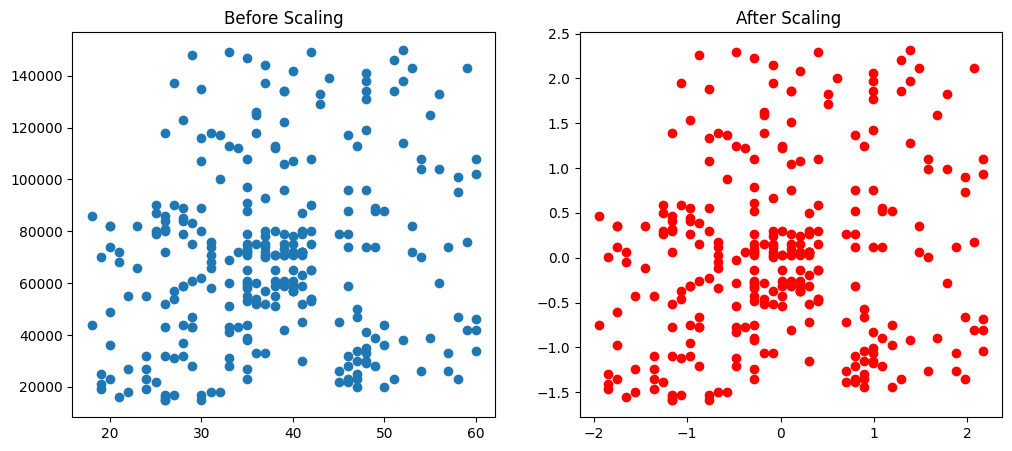

In [26]:
fig,(ax1,ax2) = plt.subplots(ncols = 2, figsize=(12,5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color  = 'red')
ax2.set_title('After Scaling ')
plt.show()

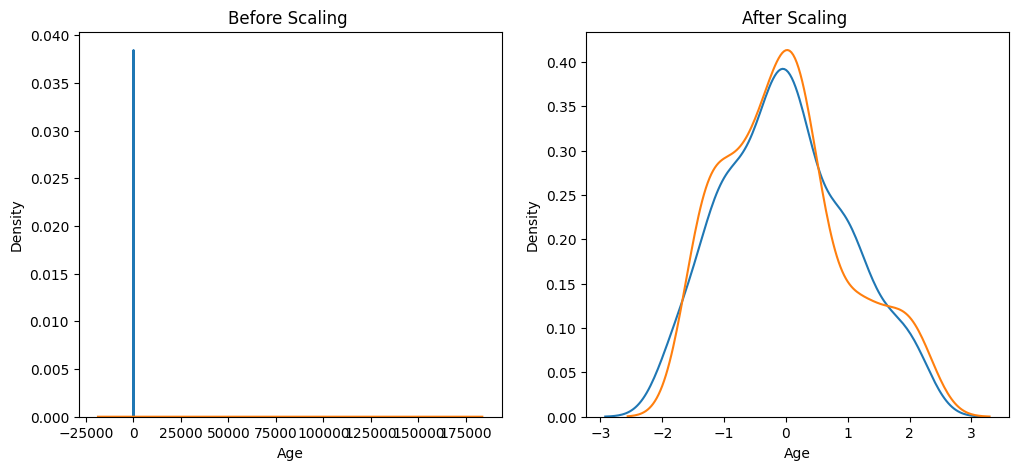

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling 
ax1.set_title('Before Scaling ')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

## after scaling 
ax2.set_title('After Scaling ')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

### Comparison of distributions 


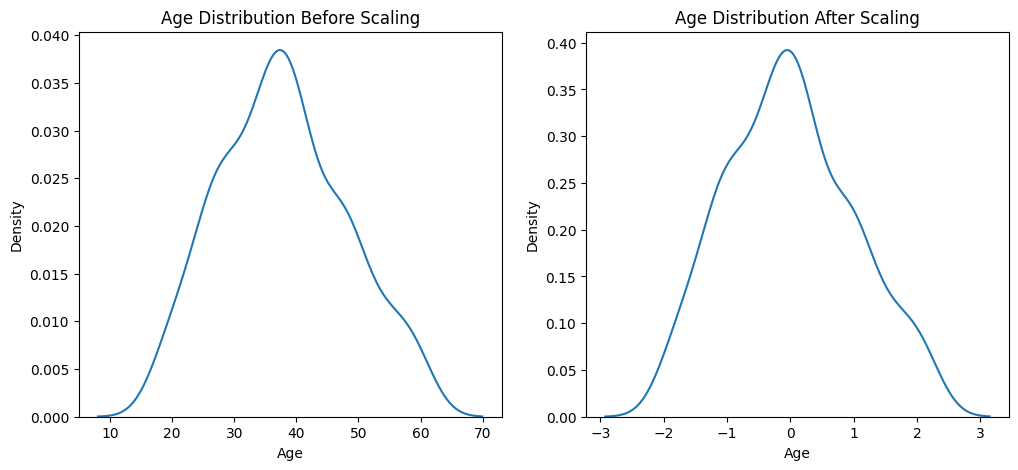

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

## Before Scaling 
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'],ax=ax1)

## After Scaling 
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

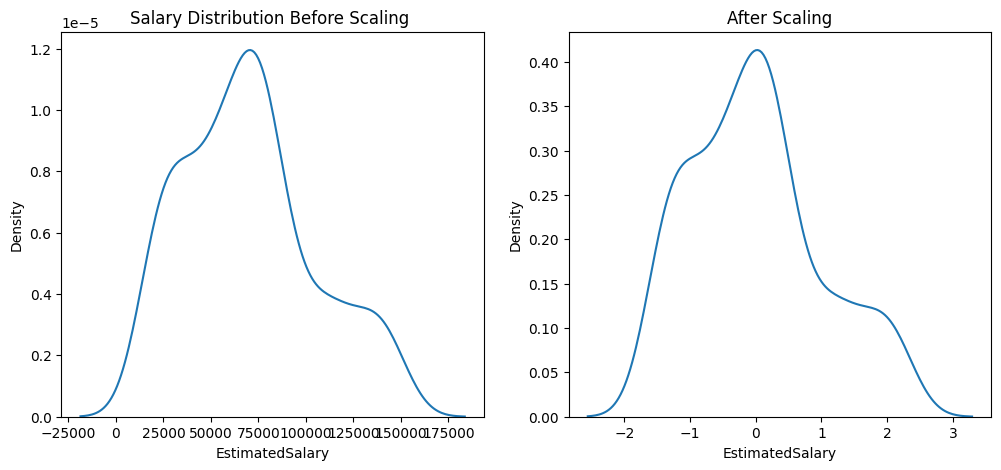

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Salary Distribution Before Scaling ')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

### Why Scaling is important ?


In [32]:
from sklearn.linear_model import LogisticRegression


In [33]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [34]:
lr.fit(x_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [35]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [36]:
from sklearn.metrics import accuracy_score

print('Actual', accuracy_score(y_test,y_pred))
print('Scaled', accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [37]:
from sklearn.tree import DecisionTreeClassifier


In [38]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [39]:
dt.fit(x_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [44]:
y_pred = dt.predict(x_test)
y_scaled_pred = dt.predict(X_test_scaled)


In [46]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_scaled_pred))

Actual 0.875
Scaled 0.6583333333333333


In [48]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


AttributeError: 'DataFrame' object has no attribute 'append'

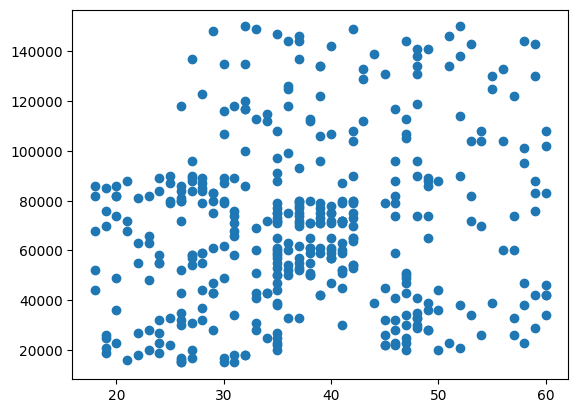

In [49]:
plt.scatter(df['Age'], df['EstimatedSalary'])
